#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  689.06 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 689.06  |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
# My name is Carl Torgny Helin, username carlthe. 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

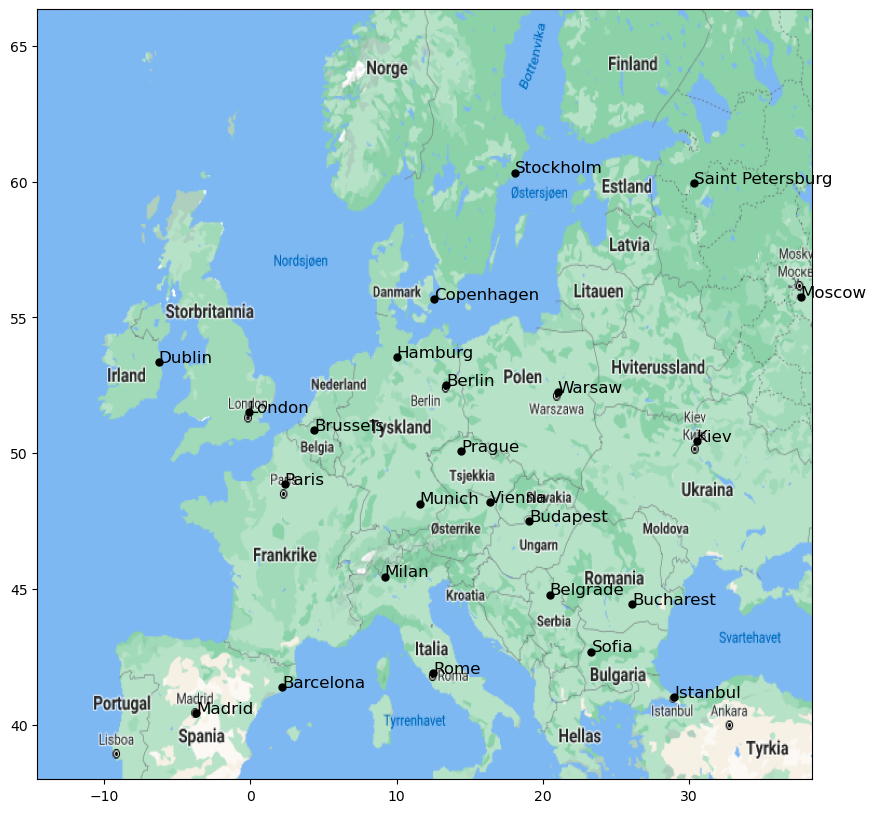

In [3]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [4]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


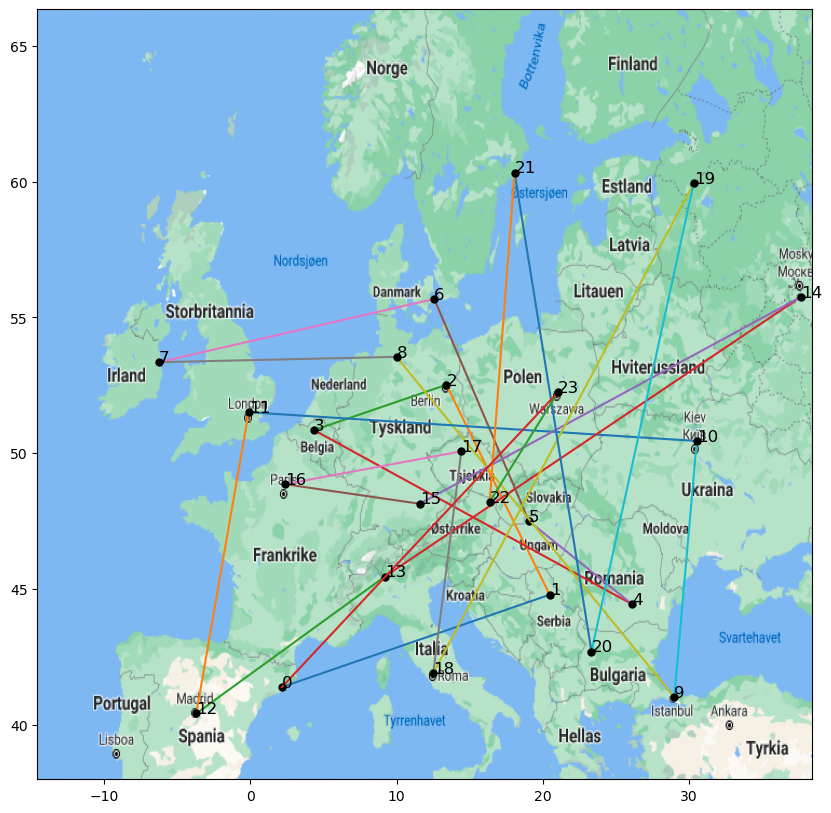

In [5]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

Travelled route:           ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels']
Final cost of the route:   5018.8099999999995 km
Program took               0.0020210742950439453 seconds


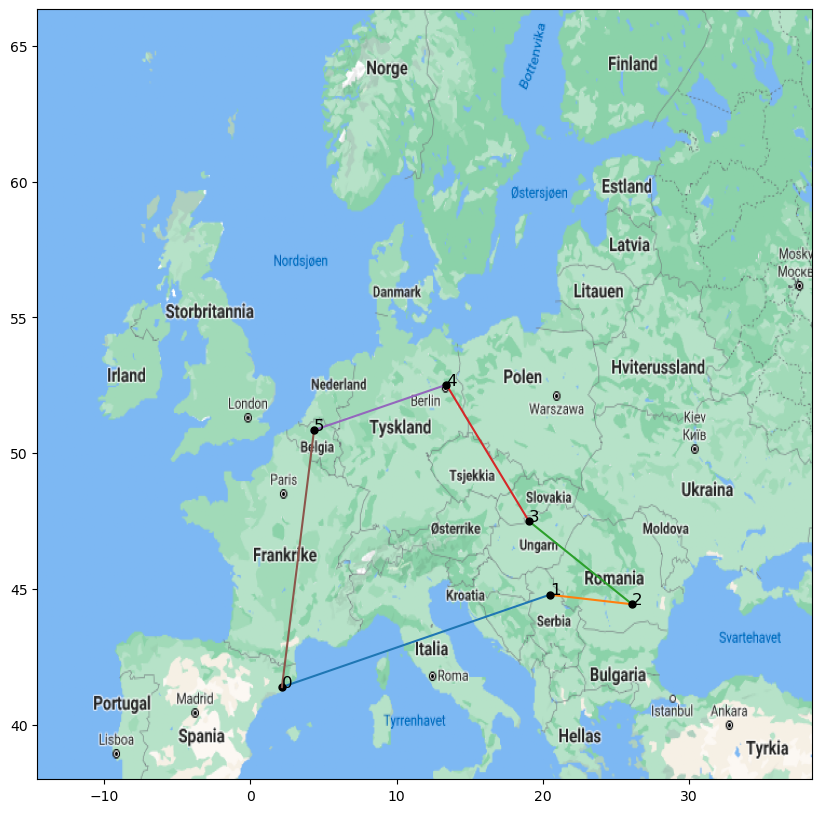

Travelled route:           ['Belgrade', 'Budapest', 'Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Kiev', 'Istanbul', 'Bucharest']
Final cost of the route:   8339.359999999999 km
Program took               108.79976797103882 seconds


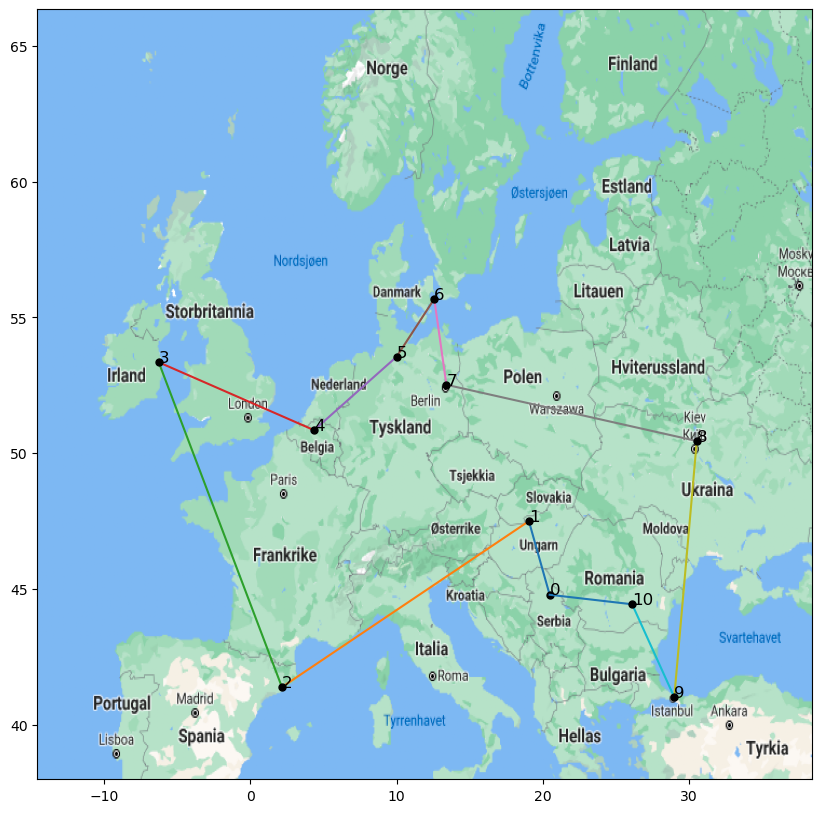

In [12]:
import math
import time
import itertools

dota = []
with open("european_cities.csv", "r") as f:
    dota = list(csv.reader(f, delimiter=';'))
    cities = dota[0]


tuple_hash = {}
for count1, city1 in enumerate(dota[0]):
    for count2, city2 in enumerate(dota[0]):
        tuple_hash[(city1,city2)] = dota[count1+1][count2]

def distance(country1, country2):
    return tuple_hash[(country1,country2)]

# Help method for more concise prints of results
def print_list_cost(cost, list):
    print("Travelled route:           {}".format(list))
    print("Final cost of the route:   {} km".format(cost))

# First I make lists of all the possible routes starting from 
# the first city, then i split the list in half since the 
# method .permutations are ordered and the distance travelled
# from city A -> B -> C is the same as C -> B -> A
def give_perm_list(city_order, n):
    perm = list(itertools.permutations(city_order[0:n]))
    perm_list = [list(x) for x in perm]
    return perm_list[:len(perm_list)//2]

# Then I iterate the list of routes and calculate the total 
# distance travelled plus the distance from final stop to the 
# start point and I keep the shourtest route possible after going 
# trough all the possible routes
def exhaustive_search(city_order, n):  
    perm_list = give_perm_list(city_order, n)
    final_list = []
    final_cost = float('inf') 

    for value in perm_list:
        cost = 0
        for country in range(len(value)-1):
            cost += float(distance(value[country], value[country+1]))
        cost += float(distance(value[0], value[-1]))
        if cost < final_cost:
            final_list = value
            final_cost = cost
    print_list_cost(final_cost, final_list)
    return final_list

    
city_order = list(city_coords.keys())

start_time = time.time()
city_order = exhaustive_search(city_order, 6)
print("Program took               {} seconds".format((time.time() - start_time)))
plot_plan(city_order)

new_order = list(city_coords.keys())
new_time = time.time()
new_order = exhaustive_search(new_order, 11)
print("Program took               {} seconds".format((time.time() - new_time)))
plot_plan(new_order)

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [7]:
# The shortest route I found among the first 10 cities are

# ['Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul'] or 
# ['Barcelona', 'Istanbul', 'Bucharest', 'Belgrade', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin'] or 
#  any other combination with the cities in the same order

# The program took about 7.15 seconds to find out the answer for 10 cities

#   n           time                        increase multiplied
# 5 cities = 0.00026702880859375 seconds        0.91503268
# 6 cities = 0.001422882080078125 seconds       5.328571429
# 7 cities = 0.006685972213745117 seconds       4.698894102
# 8 cities = 0.05447983741760254 seconds        8.148379275
# 9 cities = 0.5113012790679932 seconds         9.385146933
# 10 cities = 7.15315318107605 seconds          13.99009444
# 11 cities = 88.60693502426147 seconds         12.38711555

# It's clear that the time it takes increases exponentially, the reason 
# for this is because the possibilities for one more city increases the 
# possible routes factorial 

#                                                                   factorial
# Possible routes for 6 cities are 720                                   6
# Possible routes for 7 cities are 5,040                                 7
# Possible routes for 8 cities are 40,320                                8
# Possible routes for 9 cities are 362,880                               9
# Possible routes for 10 cities are 3,628,800                            10
# Possible routes for 11 cities are 39,916,800                           11
# Possible routes for 12 cities are 479,001,600                          12
# Possible routes for 13 cities are 6,227,020,800                        13
# Possible routes for 14 cities are 87,178,291,200                       14
# Possible routes for 15 cities are 1,307,674,368,000                    15
# ...
# Possible routes for 24 cities are 620,448,401,733,239,439,360,000      24

# Based on that 11 cities took over a minute and 12 cities took too long we can 
# definitely assume that if we are testing this method for 24 cities its going 
# to take a while. This problem can actually translate to a brute force password
# calculator, since we're also almost trying all possible permutations as well. 

# According to this website https://tmedweb.tulane.edu/content_open/bfcalc.php
# if we're trying 475,920,314,814,253,359,955,968 combinations (of passwords)
# instead of the  620,448,401,733,239,439,360,000 combinations as in our example
# it will take 384,752,893,146.37 days or 1 million year-ish, but this is based
# on a typical PC processor in 2007 and that the processor is under 10% load.

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

Travelled route:           ['Brussels', 'Hamburg', 'Berlin', 'Copenhagen', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul', 'Barcelona', 'Dublin']
Final cost of the route:   7791.889999999999 km
Program took               0.0005512237548828125 seconds


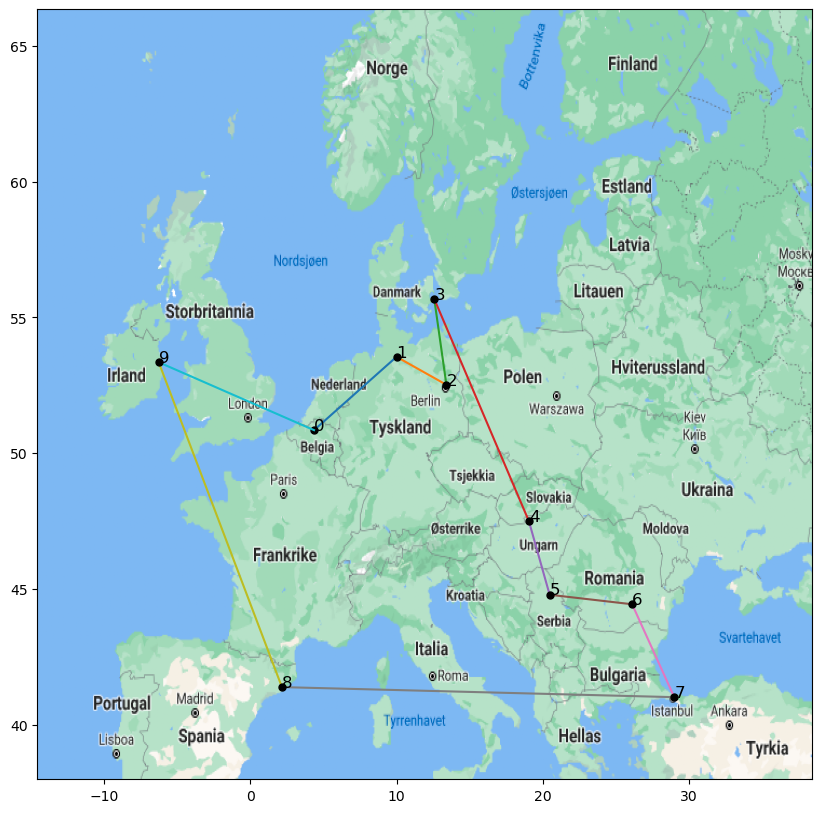

Travelled route:           ['Milan', 'Munich', 'Prague', 'Vienna', 'Budapest', 'Belgrade', 'Sofia', 'Bucharest', 'Istanbul', 'Kiev', 'Warsaw', 'Berlin', 'Hamburg', 'Copenhagen', 'Stockholm', 'Saint Petersburg', 'Moscow', 'Brussels', 'Paris', 'London', 'Dublin', 'Madrid', 'Barcelona', 'Rome']
Final cost of the route:   13754.110000000002 km
Program took               0.00030112266540527344 seconds


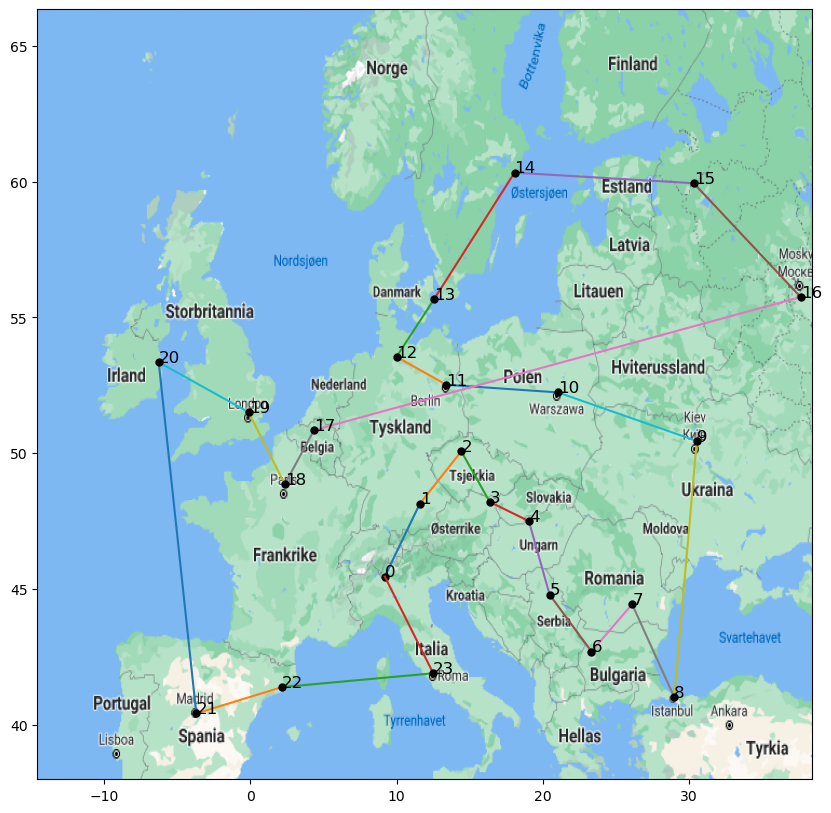

In [8]:
import math
import time
import random

# Algorithm implemented where we start of in a random city, then we go trough the 
# neighbours to this city and keep the shortest one. The next will be to go trough
# the neighbours to the first shortest one and find the shortest one to this one

def hill_climber(city_order, n):
        shortest_city_order = []
        total_distance_travelled = 0

        random_start = random.randint(0,n-1)
        shortest_city_order.append(city_order[random_start])

        for counter in range(n):
                current_neighbour_distance = float('inf')
                current_shortest_neighbour = None
                current_city_coords = city_coords[shortest_city_order[-1]]

                for neighbour in range(n):
                        neighbour = city_order[neighbour]

                        if neighbour not in shortest_city_order:
                                disctance_beetween_cities = float(distance(shortest_city_order[-1], neighbour))

                                if disctance_beetween_cities < current_neighbour_distance:
                                        current_neighbour_distance = disctance_beetween_cities
                                        current_shortest_neighbour = neighbour

                if current_shortest_neighbour != None:
                        shortest_city_order.append(current_shortest_neighbour)
                        total_distance_travelled += current_neighbour_distance
                        
        start_to_finish = float(distance(shortest_city_order[0], shortest_city_order[-1]))
        total_distance_travelled += start_to_finish
        
        print_list_cost(total_distance_travelled, shortest_city_order)
        return shortest_city_order
                        
    
city_order = list(city_coords.keys())

start_time = time.time()
new_order = hill_climber(city_order, 10)
print("Program took               {} seconds".format((time.time() - start_time)))
plot_plan(new_order)

new_time = time.time()
new_city_order = hill_climber(city_order, 24)
print("Program took               {} seconds".format((time.time() - new_time)))
plot_plan(new_city_order)

# 20 times run for 10 cities and 24 cities, results are bellow

# 10 cities, run 20 times
# Best 7680.49 km
# Worst 8309.61 km
# Mean 7939.1885 km
# Standard deviation 218.4215817 km

# 24 cities, run 20 times
# Best 12095.08 km
# Worst 14218.74 km
# Mean 13270.619 km
# Standard deviation 638.6070744 km



## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

Travelled route:           ['Brussels', 'Berlin', 'Bucharest', 'Belgrade', 'Budapest', 'Barcelona']
Final cost of the route:   5270.45 km


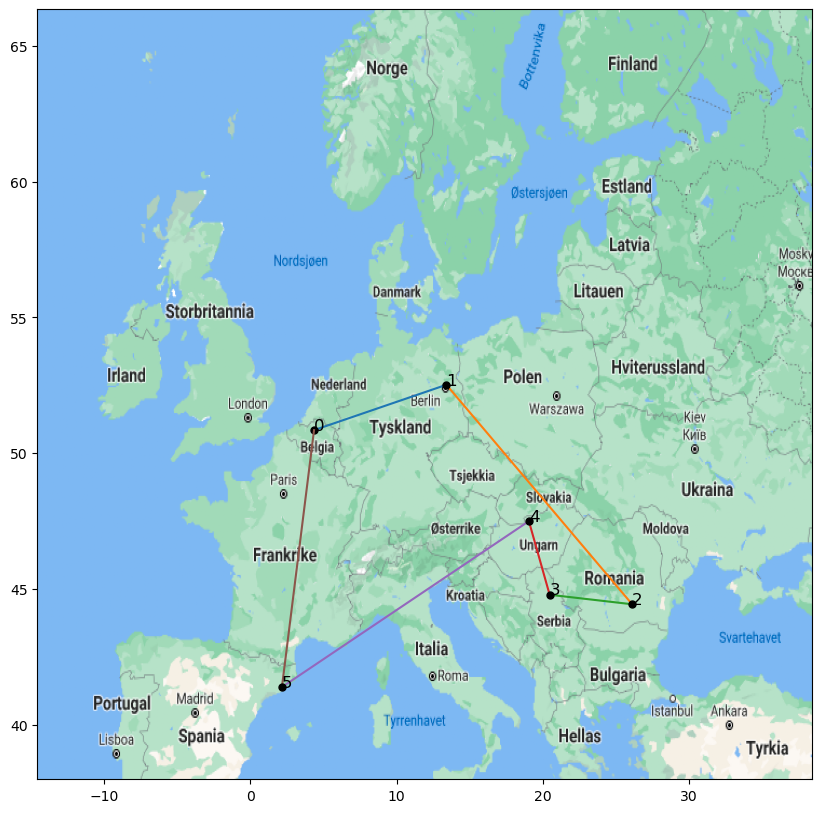

Travelled route:           ['Istanbul', 'Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest']
Final cost of the route:   7503.099999999999 km


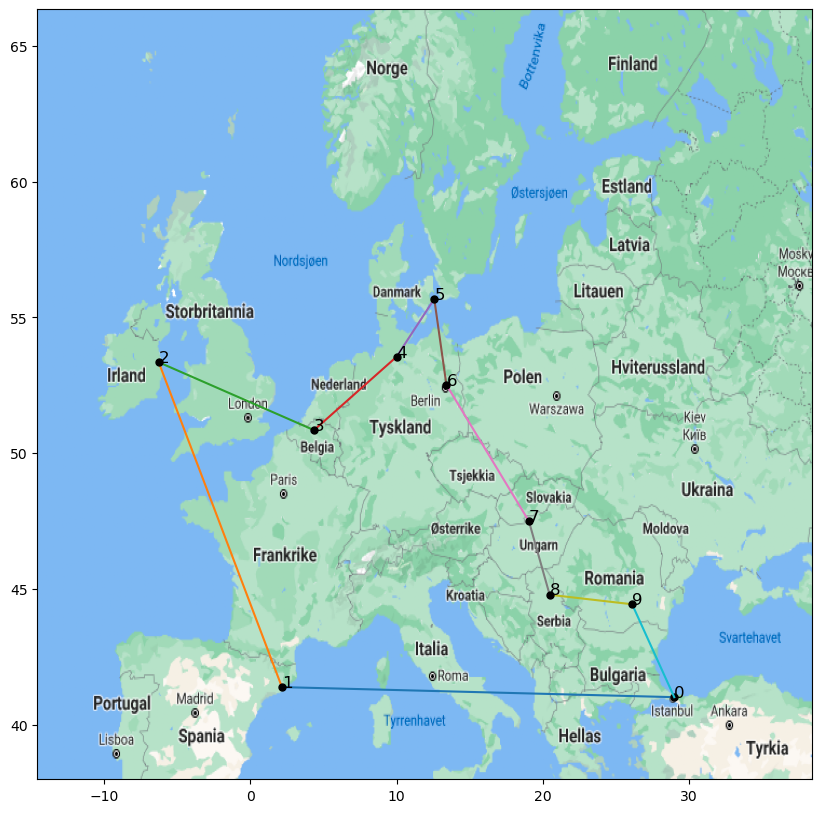

Travelled route:           ['Dublin', 'London', 'Paris', 'Brussels', 'Hamburg', 'Berlin', 'Munich', 'Milan', 'Prague', 'Vienna', 'Belgrade', 'Sofia', 'Istanbul', 'Bucharest', 'Kiev', 'Moscow', 'Saint Petersburg', 'Stockholm', 'Copenhagen', 'Warsaw', 'Budapest', 'Rome', 'Barcelona', 'Madrid']
Final cost of the route:   13502.43 km


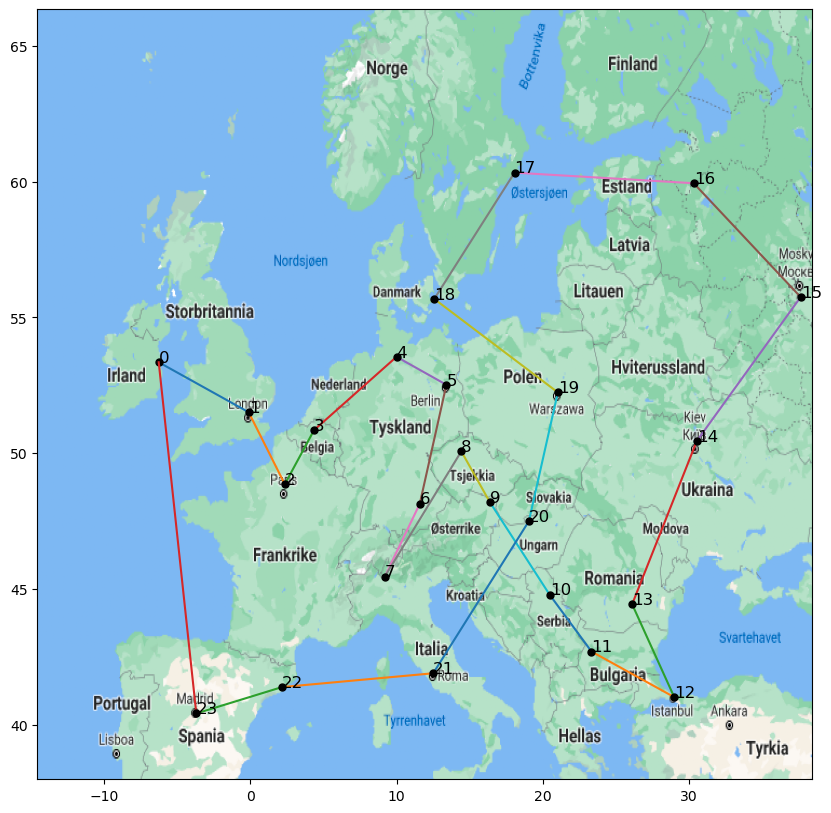

In [9]:
# Function that returns a shuffled list made
# for initializing the original population
def give_list(cities, n_cities, n_lists):
    list = []
    for i in range(n_lists):
        instance = cities[0:n_cities]
        random.shuffle(instance)
        list.append(instance)
    return list

# Function that returns a corresponding amount 
# of lists for 6, 10 and 24 cities
def initial_population(cities):
    ten_pop, hundred_pop, thousand_pop = give_list(cities, 6, 10), give_list(cities, 10, 100), give_list(cities, 24, 1000)
    return ten_pop, hundred_pop, thousand_pop

# Fitness calculation to calculate the current 
# cost of a traveling route for the salesman
def fitness(current_list):
    lower_cost_is_better = 0
    for index in range(len(current_list)-1):
        country1 = current_list[index]
        country2 = current_list[index+1]
        lower_cost_is_better += float(distance(country1, country2))
    lower_cost_is_better += float(distance(current_list[0], current_list[-1]))
    return lower_cost_is_better

# Function made to select the 10 cheapest solutions 
# to initialize the starting population. 
def parent_selection(list_of_lists_cities):
    n_cities = len(list_of_lists_cities[0])
    ten_lists, highest_scores = [], []
    for list in list_of_lists_cities:
        tmp_score = fitness(list)
        if len(ten_lists) < 10:
            ten_lists.append(list)
            highest_scores.append(tmp_score)
        else:
            tmp_highest = max(highest_scores)
            index = highest_scores.index(tmp_highest)
            if tmp_score < tmp_highest:
                ten_lists[index] = list 
    return ten_lists, highest_scores     

# Method that sorts parents and scores, at this moment 
# its not using the option to replace any better 
# solutions to worse in case you want more exploration 
# because after several tries I figured out this only 
# gave me worse reults. 
def survivor_selection(parents, scores):
    scores, parents = (list(t) for t in zip(*sorted(zip(scores, parents))))
    for i in range(5, 10):
        rand = random.randint(0, 100)
        if rand > 101:
            child, child_score = parents.pop(), scores.pop()
            parents[i], scores[i] = child, child_score
        else:
            parents.pop()
            scores.pop()
    return parents, scores

# This piece of code is basically the solution from the 
# weekly excersice from week 3, the algorithm itself donates 
# a section from parent 1 and sprinkles the genetic material
# from parent 2 in the rest of the child. 
def pmx_crossover(parent_a, parent_b, start, stop):
    child = [None]*len(parent_a)
    child[start:stop] = parent_a[start:stop]
    
    for ind, x in enumerate(parent_b[start:stop]):
        ind += start
        if x not in child:
            while child[ind] != None:
                ind = parent_b.index(parent_a[ind])
            child[ind] = x
    for ind, x in enumerate(child):
        if x == None:
            child[ind] = parent_b[ind]
    return child

# Function that swaps two positions on the chromosome at random
def swap_mutation(list):
    i = random.randint(0, len(list)-1)
    j = random.randint(0, len(list)-1)
    list[i], list[j] = list[j], list[i]
    return list

# Function that returns 5 new children using pmx 
# indexes various from the size of the routes
# start and stop for 6 cities will be 2 and 4
# start and stop for 10 cities will be 4 and 7
# start and stop for 24 cities will be 11 and 19
def five_new_children(parents):
    n_cities = len(parents[0])
    start, stop = n_cities//2-1, n_cities//2-1+n_cities//3
    children, scores = [], []
    for i in range(5):
        child = pmx_crossover(parents[i], parents[i+5], start, stop)
        swapped_child = swap_mutation(child)
        children.append(swapped_child)
        scores.append(fitness(children[i]))
    return children, scores

# Method that runs the program itself, first it creates
# parents and selects ten to start with. Then iterates
# a set number of generations with creating children (pmx), 
# crossing over the child and keeps the child if its
# better than some of the parents. 
def plot_six_ten_twenty(population, generation):
    parents, scores = parent_selection(population)
    while generation > 0:
        children, children_scores = five_new_children(parents)
        offspring = parents + children
        offspring_scores = scores + children_scores
        parents, scores = survivor_selection(offspring, offspring_scores)
        generation -= 1
    print_list_cost(scores[0], parents[0])
    plot_plan(parents[0])

city_order = list(city_coords.keys())
six_ten, ten_hundred, twenty_thousad = initial_population(city_order)

plot_six_ten_twenty(six_ten, 5)
plot_six_ten_twenty(ten_hundred, 100)
plot_six_ten_twenty(twenty_thousad, 700)




In [10]:
from IPython.display import Image
Image(url="Plot_figure.png", width=720, height=441)

# Underneath you can see I've plotted 500 generations run on 
# 6, 10 and 24 cities with corresponding population sizes as
# 10, 100 and 1000. 

# I've figured out that the algorithm needs more generations to 
# find the optima when trying to figure out the shortest route 
# for 24 cities.

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [11]:
# Generations   700         100         5          
# Population n  1000        100         10

# Cities        24 Cities   10 Cities   6 Cities
# BEST	        12722.56	7486.31     5018.81 km
# AVERAGE 	    13911.18	7792.08 	5374.33 km
# WORST	        15703.06    8444.45	    5778.38 km
# STDV	        798.96   	322.37	    290.36  km
# TIME          0.06        0.0075      0.0005  seconds


# Among the first 10 cities we see that my EA did
# find the shortest route when run 20 times. 

# The running time for my algorithm is much faster
# then the exhaustive search, due to less routes. 

# The number of tries the EA algorithm depends on 
# how many generations we decide to run it with and 
# how many routes to put into the original population. 

# At this moment without changing variables the algorithm 
# will inspect 600 routes among 10 cities if its starting
# population is 100 routes and running with 100 generations.  
